# Titanic tutorial 
ref : https://kaggle-kr.tistory.com/17?category=868316

# process 
1. 데이터셋 확인
2. EDA

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplot 기본 scheme 말고 seaborn scheme을 세팅. 일일이 사이즈 지정이 필요 x 
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 1. Datset 확인

In [9]:
df_train = pd.read_csv('data_1/train.csv')
df_test = pd.read_csv('data_1/test.csv')

In [10]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# 여러 통계치들을 반환해줌 
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# 테이블에서 보다시피, PassenserID 숫자와 다른, 그러니까 null data가 존재하는 열(feature)가 있는 것 같습니다?
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1 Null data check

In [13]:
for col in df_train.columns : 
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :   Survived	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 19.87%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.00%
column :      Cabin	 Percent of NaN value: 77.10%
column :   Embarked	 Percent of NaN value: 0.22%


In [14]:
for col in df_test.columns : 
    msg = 'column : {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 20.57%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.24%
column :      Cabin	 Percent of NaN value: 78.23%
column :   Embarked	 Percent of NaN value: 0.00%


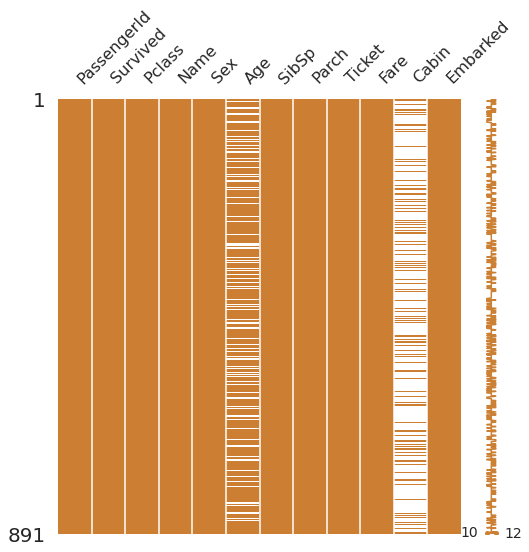

In [15]:
# msno : null data 존재를 쉽게 볼 수 있음
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color = (0.8, 0.5, 0.2))

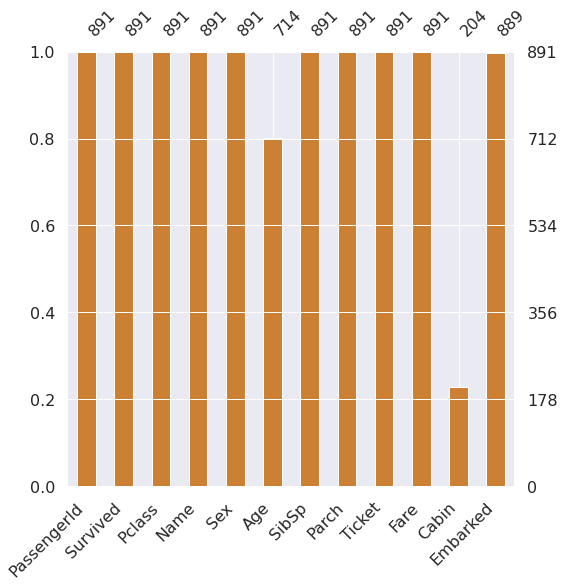

In [17]:
msno.bar(df=df_train.iloc[:,:], figsize=(8, 8), color=(0.8,0.5,0.2))

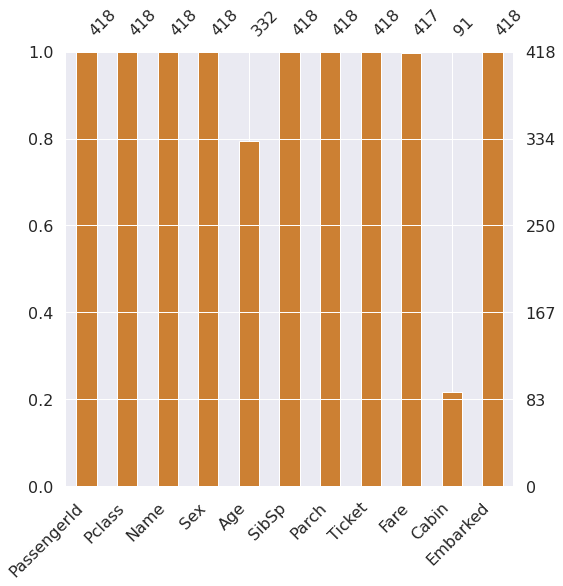

In [18]:
msno.bar(df=df_test.iloc[:,:], figsize=(8, 8), color=(0.8,0.5,0.2))

### 1.2 Target label check 
* check the target label's distribution

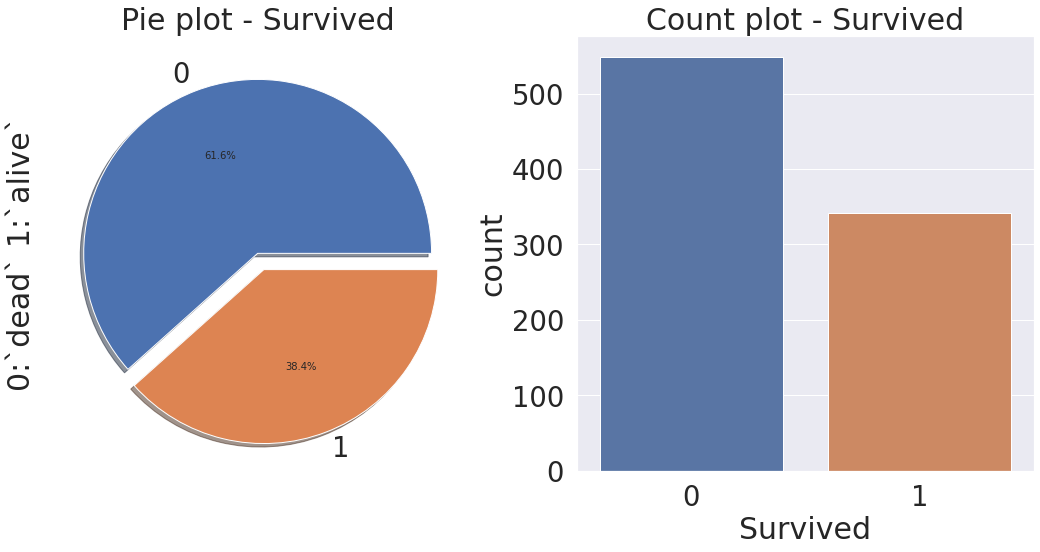

In [22]:
f, ax = plt.subplots(1, 2, figsize=(18,8)) # (1,2)

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow =True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('0:`dead` 1:`alive`')
sns.countplot('Survived', data = df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

## 2. Exploratory data analysis
* visualization
    * matplotlib
    * seaborn
    * plotly
    * ...

### 2.1 Pclass
* Pclass : ordinal data
* pivot chart : groupby.pivot
* survival rate

In [23]:
# Pclass 별 인구 수 
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [24]:
# Pclass 별 생존자 수(1인 경우)
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [25]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [26]:
# Pclass 별 생존률
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


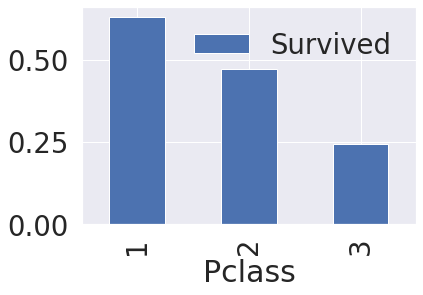

In [27]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

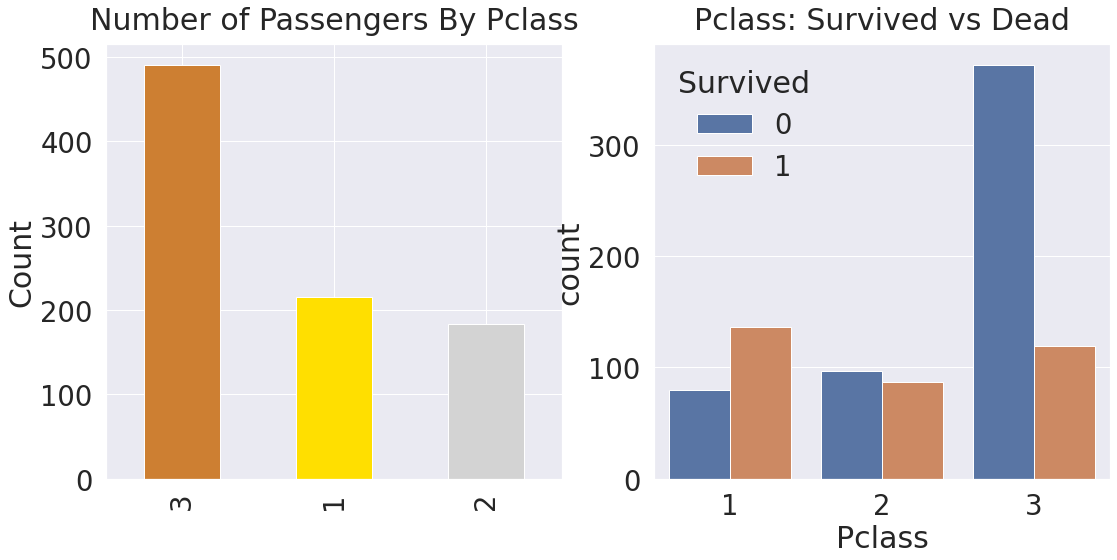

In [31]:
y_position = 1.02 # title이 위치할 곳 (1.02 : 상단, 0.5 : 중단) 
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

### 2.2 Sex
* pandas groupby
* seaborn countplot

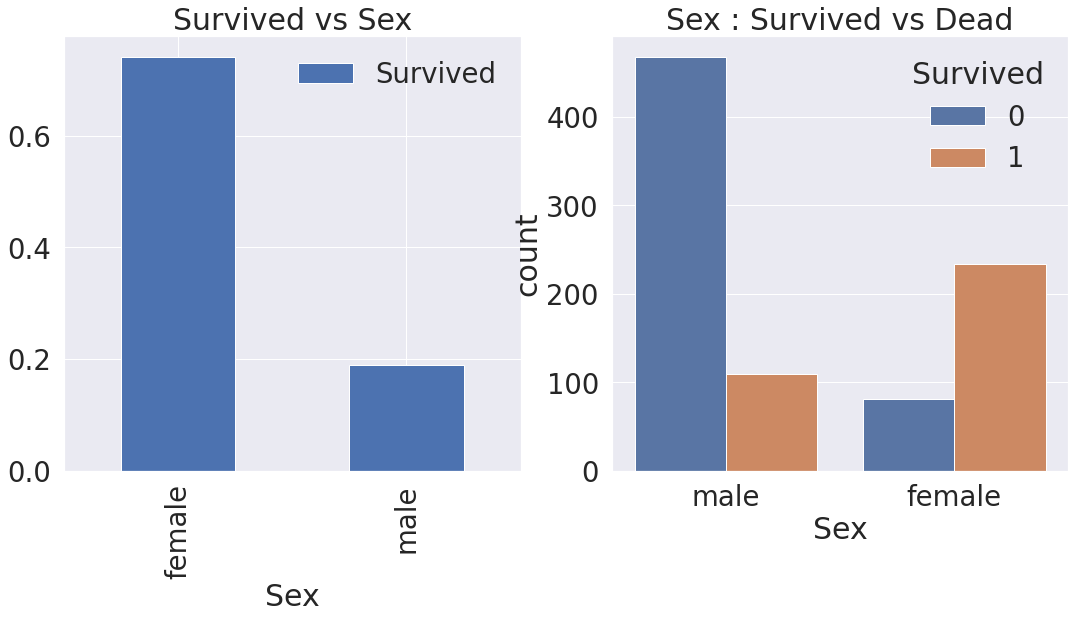

In [33]:
f, ax = plt.subplots(1,2, figsize = (18,8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data = df_train, ax=ax[1])
ax[1].set_title('Sex : Survived vs Dead')
plt.show()

In [35]:
# 성별에 따른 생존률
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### 2.3 Both Sex and Pclass
* Survival rate with Sex, Pclass 
* seaborn.factorplot : 3D Graph

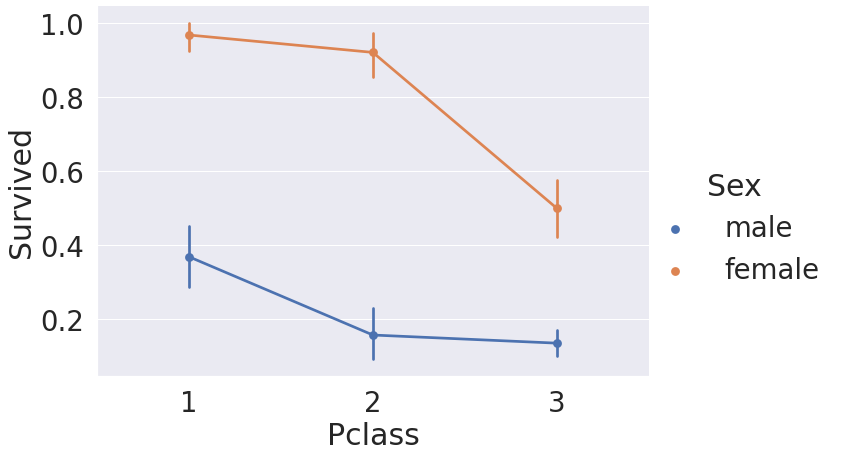

In [38]:
# aspect : 가로 / 세로
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train, size = 6, aspect = 1.5)

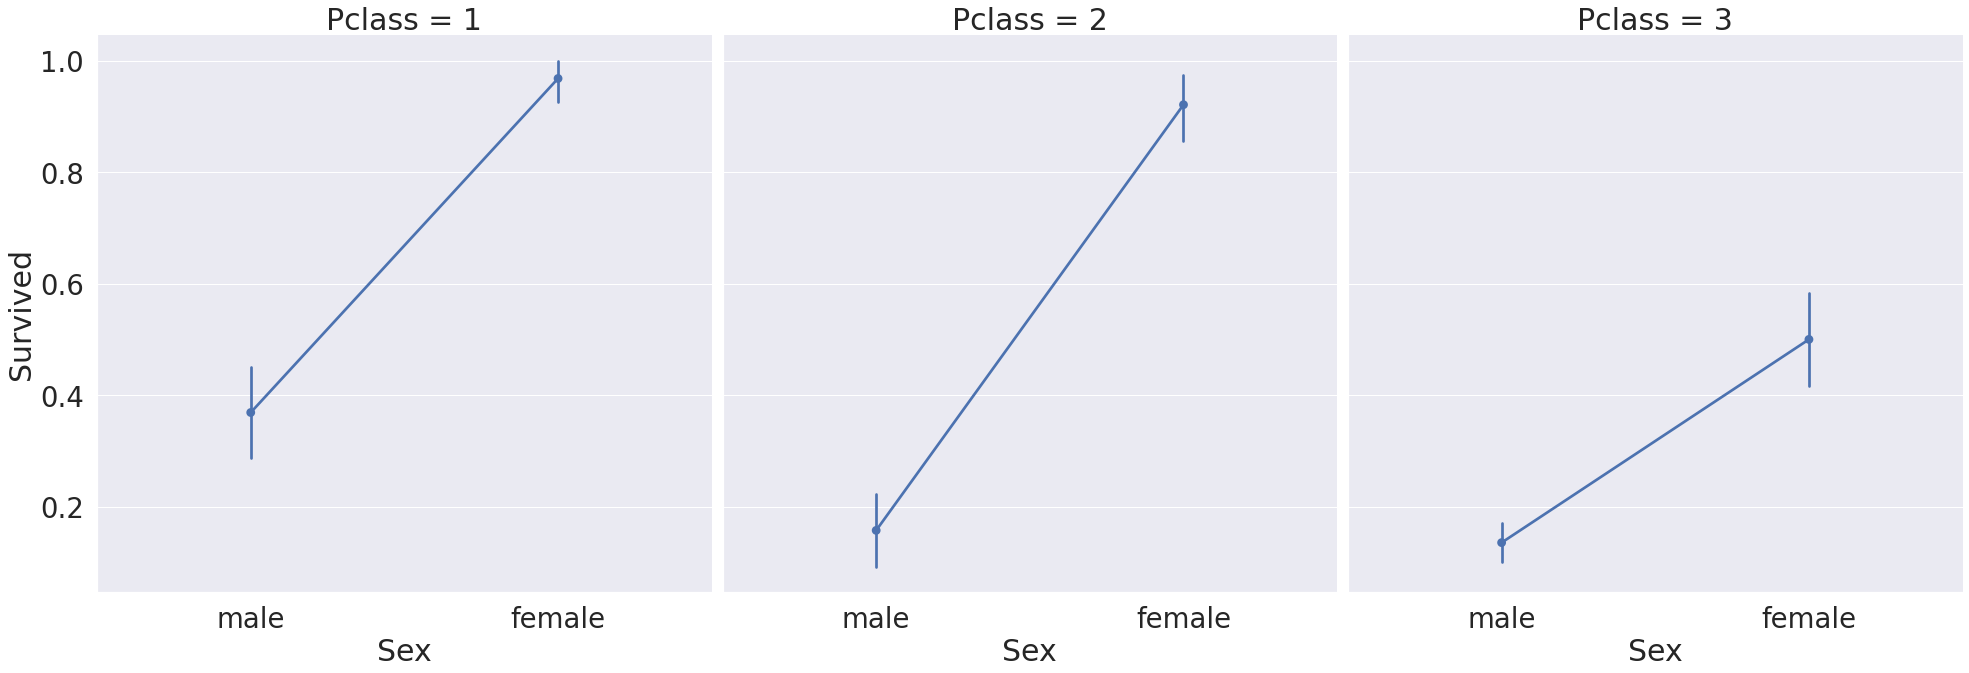

In [39]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation =.5, size=9, aspect=1)

### 2.4 Age

In [40]:
# 분포를 확인하기 전에 최대, 최소, 평균 값 정도를 출력
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


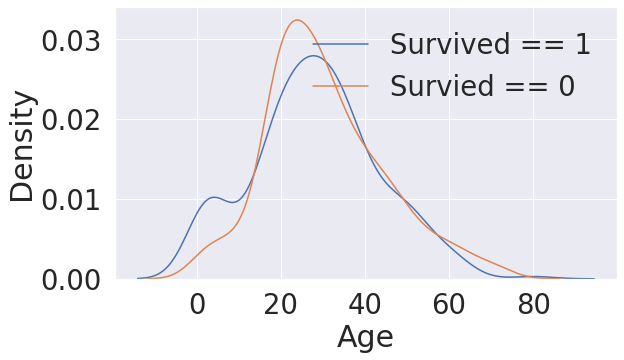

In [41]:
# 연령별 나이 분포
fig, ax = plt.subplots(1, 1, figsize = (9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survied == 0'])
plt.show()

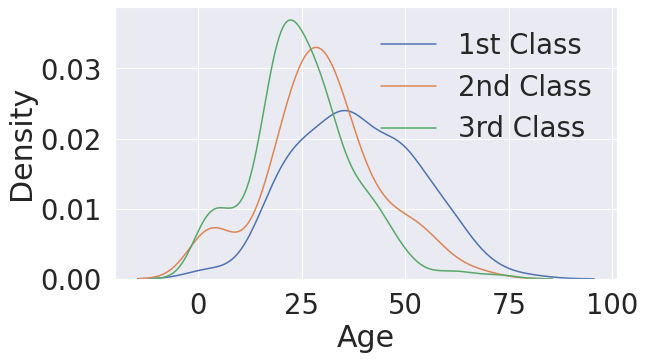

In [42]:
fig, ax = plt.subplots(1, 1, figsize = (9,5))
sns.kdeplot(df_train[df_train['Pclass'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Pclass'] == 2]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Pclass'] == 3]['Age'], ax=ax)
plt.legend(['1st Class','2nd Class', '3rd Class'])
plt.show()

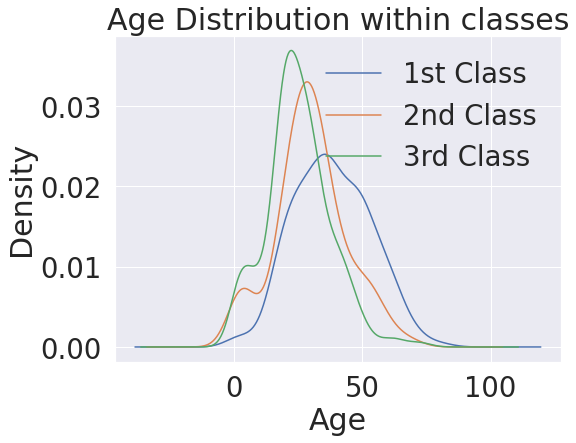

In [43]:
# 간단하게 plot(kind='kde')로 kdeplot을 그릴수 있다. 
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

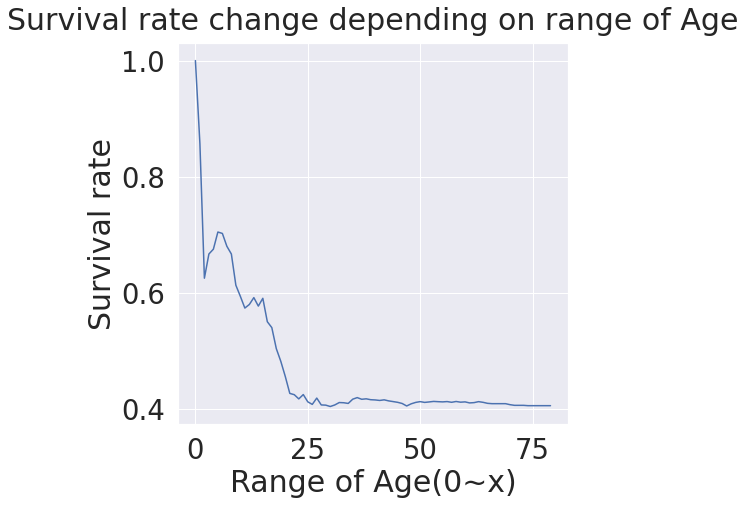

In [47]:
# 나이대별 생존률 
cum_survival_ratio = []
for i in range(1,81) : # 나이 min = 0, 최대 80
    cum_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / 
                              len(df_train[df_train['Age'] < i]['Survived'])) 

plt.figure(figsize = (7,7))
plt.plot(cum_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

### 2.5 Pclass, Sex, Age
* Sex, Pclass, Age, Survived 함께 확인
    * seaborn.violinplot
        * x축 : case(Pclass, sex)
        * y축 : distribution(Age)

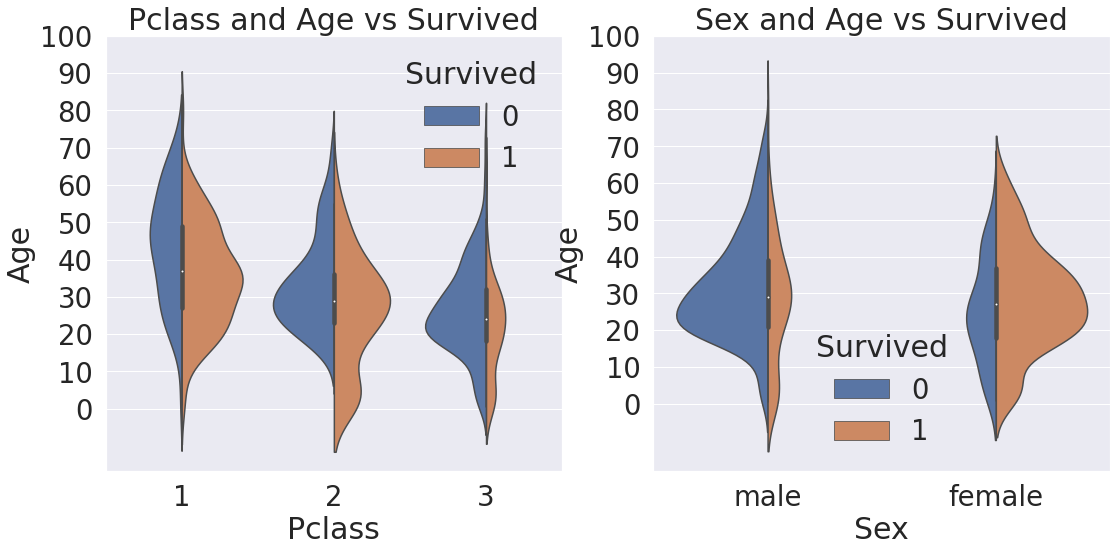

In [48]:
# violin chart
f, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data = df_train, scale = 'count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex", "Age", hue = "Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


### 2.6 Embarked
* Embarked : 탑승한 항구

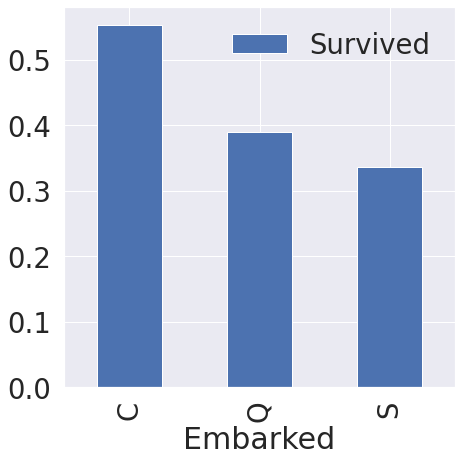

In [50]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

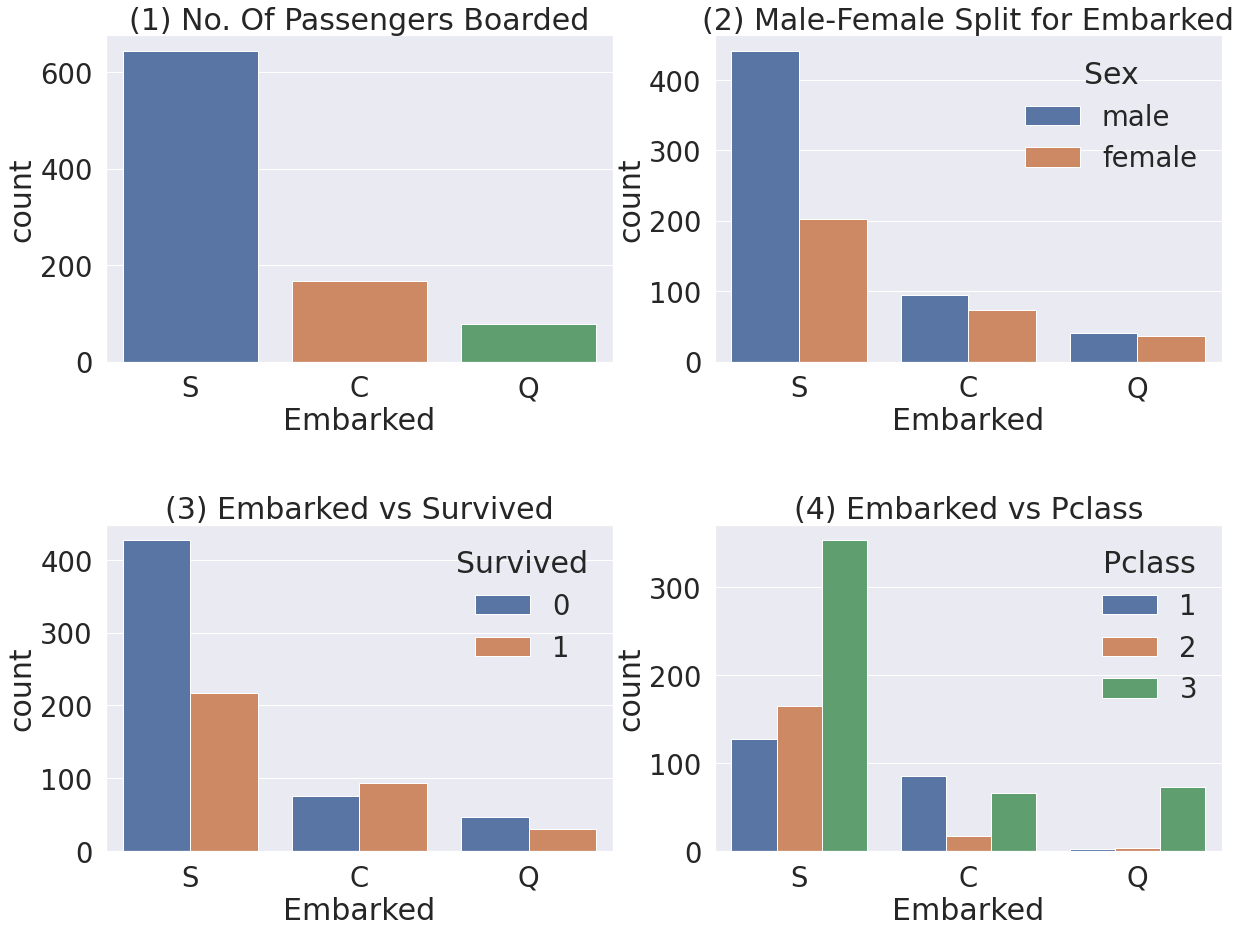

In [54]:
f, ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0]) # hue : color별 속성
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2.7 Family-SibSp(형제 자매) + Parch(부모, 자녀)
* SibSp와 Parch를 합해서 Family로 분석

In [56]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더함
df_test['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 


In [57]:
print('Maximum size of Family :', df_train['FamilySize'].max())
print('Minimum size of Family :', df_train['FamilySize'].min()) # 자신만 있는 경우 : 1

Maximum size of Family : 11
Minimum size of Family : 1


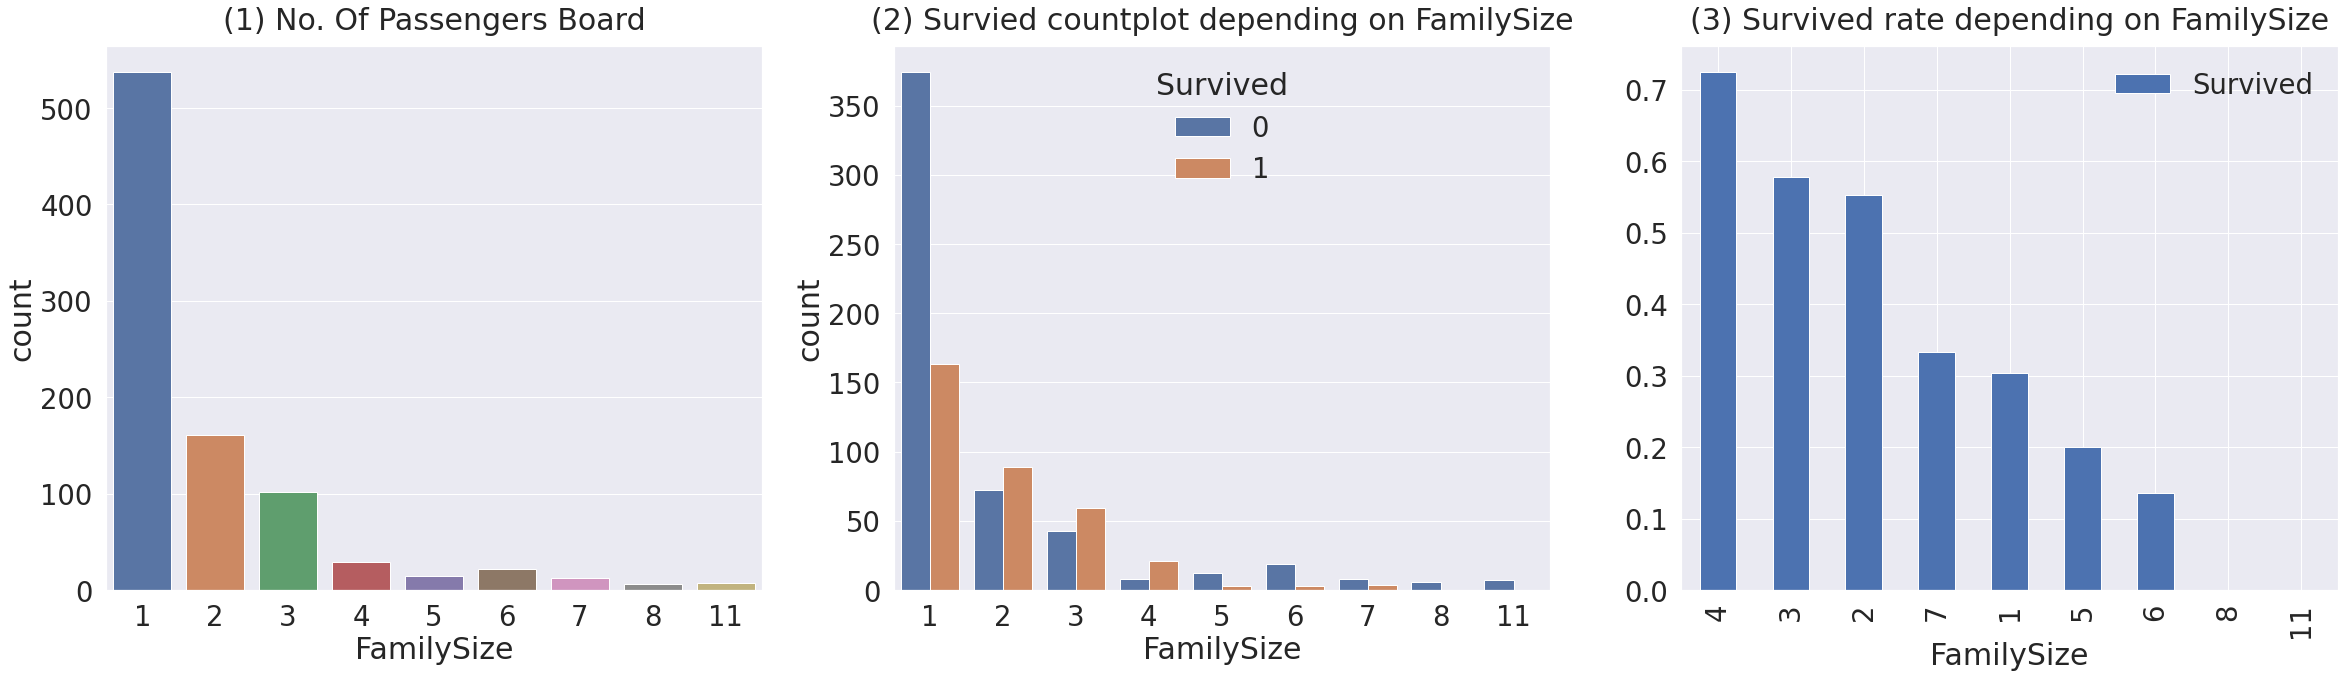

In [58]:
f, ax = plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Board', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survied countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2.8 Fare
* 탑승요금 (continuos feature) -> histogram
* histogram의 분포가 비대칭 (skewness를 가짐)
* 모델에 그대로 넣으면 outlier에 민감하게 반응하게 될수 있다. -> log를 취해줌(feature engineering)
* map, apply를 사용해서 손쉽게 값을 바꿀수 있음
* map과 lambda를 이용하면 편리

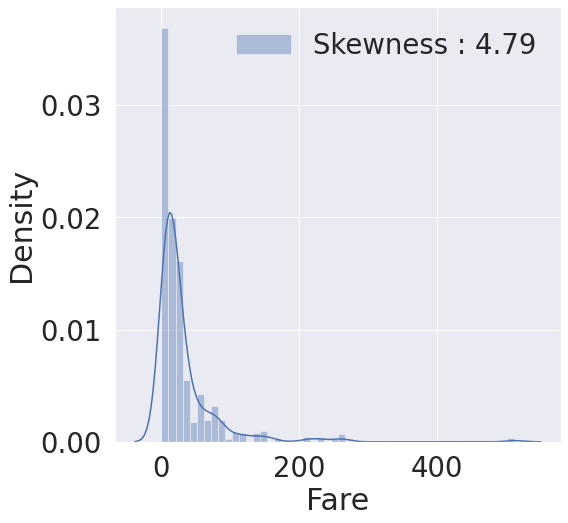

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [61]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset에 Fare컬럼에 있는 nan value를 평균값으로 치환

# log로 변환, log안에는 양수만 들어 갈수 있음 0도 들어갈 수 없음 
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i>0 else 0)

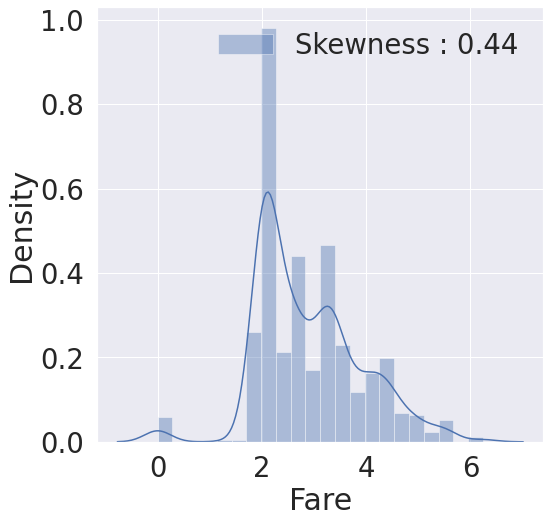

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

### 2.9 Cabin
* NaN이 대략 80%, 중요한 정보를 얻어내기 힘들어 보이기 때문에 사용하지 않기로함


In [63]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


In [68]:
df_train.isnull().sum() / df_train.isnull().count()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
FamilySize     0.000000
dtype: float64

### 2.10 Ticket
* NaN값 없음
* string data : 처리가 필요 -> 어떤 방법을 사용하면 모델에 실제로 사용가능할까?
* 아이디어를 내는 것이 캐글의 시작!
    * 티켓 앞부분의 스트링이 뭔가 의미를 갖고 있을 거같음

In [72]:
len(df_train['Ticket'].unique())

681

In [73]:
df_train['Ticket'].value_counts()

1601                 7
347082               7
CA. 2343             7
3101295              6
CA 2144              6
347088               6
382652               5
S.O.C. 14879         5
19950                4
W./C. 6608           4
4133                 4
349909               4
113760               4
2666                 4
347077               4
LINE                 4
17421                4
PC 17757             4
113781               4
363291               3
239853               3
29106                3
230080               3
PC 17572             3
371110               3
SC/Paris 2123        3
347742               3
35273                3
248727               3
C.A. 31921           3
                    ..
3101264              1
250652               1
2669                 1
STON/O 2. 3101294    1
330909               1
A/5. 10482           1
347073               1
SOTON/OQ 3101317     1
36865                1
347067               1
112050               1
330958               1
315096     

In [74]:
# 같은 티켓 번호의 경우 요금이 같고, 클래스, 항구가 동일함. 이름이 비슷한걸로 봐서 가족이거나 같이 여행을 떠난 일행일 것 같음
df_train[df_train['Ticket'] == '1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,4.034166,NaN,S,1
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,4.034166,NaN,S,1
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,4.034166,NaN,S,1
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,4.034166,NaN,S,1
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,4.034166,NaN,S,1
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,4.034166,NaN,S,1
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,4.034166,NaN,S,1


In [75]:
df_train[df_train['Ticket'] == '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,3.442819,NaN,S,7
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,3.442819,NaN,S,7
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,3.442819,NaN,S,7
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,3.442819,NaN,S,7
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,3.442819,NaN,S,7
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,3.442819,NaN,S,7
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,3.442819,NaN,S,7


In [76]:
df_train[df_train['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,4.242046,NaN,S,11
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,4.242046,NaN,S,11
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,4.242046,NaN,S,11
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,4.242046,NaN,S,11
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,4.242046,NaN,S,11
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,4.242046,NaN,S,11
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,4.242046,NaN,S,11
